In [97]:
import mesa
from model import BuildingModel
import numpy as np

ITERATIONS = 10
MAX_STEPS = 2000

params = {    
    "N": 2000, 
    "perc_uninformed_agents" : 0.00,
    "alpha" : 1,
    "beta" : 0.5,
    "speed_mean" : 0.8,
    "speed_variance" : 0.2,
}


result = mesa.batch_run(
    BuildingModel,
    parameters=params,
    iterations=ITERATIONS, 
    max_steps=MAX_STEPS,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)



  0%|          | 0/100 [00:00<?, ?it/s]

/home/matteo/miniconda3/envs/cmcs/lib/python3.11/site-packages/mesa/time.py:80: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)
/home/matteo/miniconda3/envs/cmcs/lib/python3.11/site-packages/mesa/time.py:80: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)
/home/matteo/miniconda3/envs/cmcs/lib/python3.11/site-packages/mesa/time.py:80: FutureWarning: The AgentSet is experimental. It may be changed o

In [98]:
import pandas as pd
result_df = pd.DataFrame(result)

result_df

,RunId,iteration,Step,N,perc_uninformed_agents,alpha,beta,speed_mean,speed_variance,Active_agents
0,6,0,0,2000,0.0,1,0.5,0.8,0.35,2000
1,6,0,1,2000,0.0,1,0.5,0.8,0.35,2000
2,6,0,2,2000,0.0,1,0.5,0.8,0.35,2000
3,6,0,3,2000,0.0,1,0.5,0.8,0.35,2000
4,6,0,4,2000,0.0,1,0.5,0.8,0.35,1999
...,...,...,...,...,...,...,...,...,...,...
200095,98,9,1996,2000,0.0,1,0.5,0.8,0.45,18
200096,98,9,1997,2000,0.0,1,0.5,0.8,0.45,18
200097,98,9,1998,2000,0.0,1,0.5,0.8,0.45,18
200098,98,9,1999,2000,0.0,1,0.5,0.8,0.45,18


In [99]:
result_df['RunId'].unique()

array([ 6,  2,  7,  4,  5,  0,  3,  1,  8,  9, 11, 10, 13, 12, 15, 14, 16,
       17, 19, 18, 22, 21, 20, 23, 25, 24, 26, 27, 29, 28, 30, 31, 33, 32,
       35, 34, 37, 36, 38, 39, 40, 41, 42, 45, 46, 44, 43, 47, 48, 49, 50,
       51, 52, 54, 53, 55, 56, 57, 58, 59, 62, 60, 61, 63, 65, 64, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 82, 84,
       85, 87, 86, 88, 89, 92, 91, 90, 94, 95, 93, 96, 97, 99, 98])

In [100]:
def get_active_agents_mean(df, speed_variance):
    
    df1 = df[ np.abs(df.speed_variance - speed_variance) < 1e-4]
    
    active_agents_mean = np.zeros(MAX_STEPS + 1)

    for i in df1['RunId'].unique():
        df2 = df1[df1.RunId == i][["Step", "Active_agents"]].sort_values(by="Step")
        active_agents = np.array (df2["Active_agents"].tolist() )
        active_agents_mean += active_agents

    active_agents_mean /= ITERATIONS

    return active_agents_mean



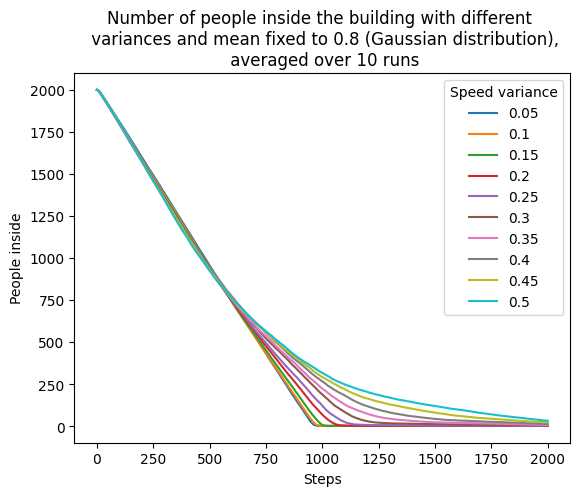

In [107]:
import matplotlib.pyplot as plt

for i in params["speed_variance"]:
    r = get_active_agents_mean(result_df, i)
    plt.plot(r, label = str(i)[:4])

plt.xlabel("Steps")
plt.ylabel("People inside")
plt.title("Number of people inside the building with different \n variances and mean fixed to 0.8 (Gaussian distribution),\n averaged over 10 runs")

plt.legend(title="Speed variance")
plt.show()
